In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = os.getcwd() + r'\ex2data2.txt'
path

'D:\\Workspace\\machine-learning-study\\notebooks\\ex2\\ex2data2.txt'

In [3]:
data = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


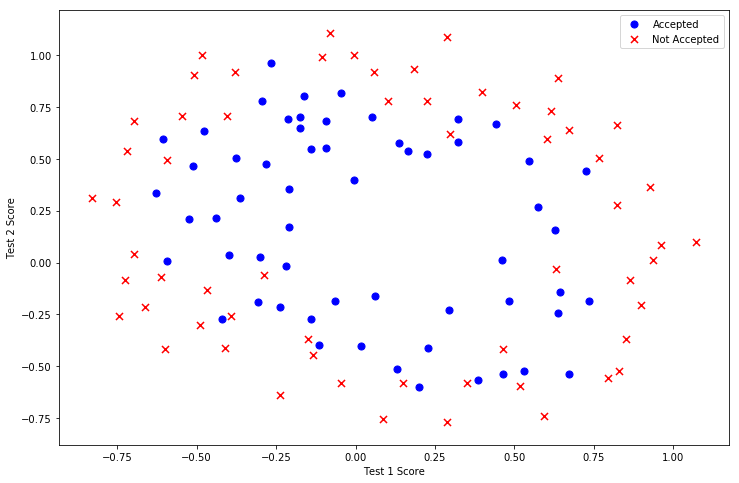

In [4]:
accepted =  data[data['Accepted'].isin([1])]  
not_accepted = data[data['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(accepted['Test 1'], accepted['Test 2'], s =50,  c='b', marker='o', label='Accepted')
ax.scatter(not_accepted['Test 1'], not_accepted['Test 2'], s=50, c='r', marker='x', label='Not Accepted')
ax.legend()
ax.set_xlabel('Test 1 Score')  
ax.set_ylabel('Test 2 Score')

In [5]:
degree = 5
x1 = data['Test 1']
x2 = data['Test 2']

data.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        print('x1^{} * x2^{}'.format(i-j, j))
        data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
        
data.drop('Test 1', axis=1, inplace=True)
data.drop('Test 2', axis=1, inplace=True)

x1^1 * x2^0
x1^2 * x2^0
x1^1 * x2^1
x1^3 * x2^0
x1^2 * x2^1
x1^1 * x2^2
x1^4 * x2^0
x1^3 * x2^1
x1^2 * x2^2
x1^1 * x2^3


In [6]:
data.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [7]:
def sigmoid(z):
    return 1 /(1 + np.exp(-z))

In [14]:
def compute_cost(theta, X, y, learning_rate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second =np.multiply((1-y), np.log(1-sigmoid(X * theta.T)))
    reg = (learning_rate / (2* len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

In [9]:
def gradient_descent_step(theta, X, y, learning_rate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if(i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learning_rate / len(X)) * theta[:,i])
        
    
    return grad

In [10]:
cols = data.shape[1]
X = data.iloc[:,1:cols]
y = data.iloc[:,0:1]

X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(11)

learning_rate = 1

In [11]:
compute_cost(theta, X, y, learning_rate)

0.6931471805599454

In [12]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=compute_cost, x0=theta, fprime=gradient_descent_step, args=(X,y, learning_rate))
result

(array([ 0.53010248,  0.29075567, -1.60725764, -0.5821382 ,  0.01781027,
        -0.21329508, -0.40024142, -1.37144139,  0.02264303, -0.9503358 ,
         0.0344085 ]), 22, 1)

In [13]:
def predict(theta, X):  
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])  
predictions = predict(theta_min, X)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print('accuracy = {0}%'.format(accuracy))

accuracy = 78%
